<a href="https://colab.research.google.com/github/nitishast/TF/blob/master/Running_a_basic_RNN_model_on_sinewave.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


In [3]:
tf.__version__

'2.1.0'

In [0]:
x = np.linspace(0,50,501)

In [0]:
print(x)

In [0]:
Y = np.sin(x)

In [0]:
#Y

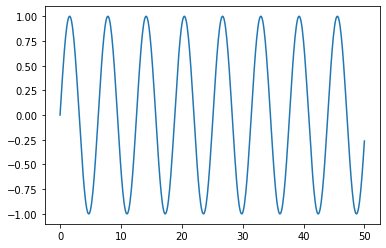

In [8]:
plt.plot(x,Y)

In [0]:
#creating a basic dataset
dataset = pd.DataFrame(data=Y,index=x,columns=['Sine'])

In [0]:
dataset

In [12]:
#Select some percent of the dataset for using to test the model. Lets select 10% from the end.
len(dataset)

501

In [0]:
test_point = np.round(0.1 * len(dataset))

In [18]:
test_point

50.0

In [0]:
test_ind = int(len(dataset) - test_point)

In [22]:
test_ind

451

In [0]:
train = dataset.iloc[:test_ind]
test = dataset.iloc[test_ind:]

In [30]:
test.shape

(50, 1)

## Next task is to scale the data. Since a RNN feeds back the data into the neuron we should scale the labels in 0,1

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
scaler = MinMaxScaler()

In [33]:
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [0]:
scaled_train = scaler.transform(train)

In [0]:
scaled_test = scaler.transform(test)

### Next is to generate a sequence of historic labels and some points into the future.

In [0]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator 
#This class takes in a sequence of data-points gathered at
#equal intervals, along with time series parameters such as
#stride, length of history, etc., to produce batches for training/validation.